<h1 align="center">Introducción</h1>

Como objetivo en el desarrollo del trabajo practico, lo que buscamos es probar el DataSet con las ingenierias de features que se le habian hecho en el tp1_exploration. En el cual se aplicó, one hot-encoder a las columnas de Sexo, Thalassemia, Chest_Pain_type bajo criterios de discusiones que encontramos de otros usuarios con mas conocimiento en la materia, dentro de las discusiones de kaggle. 
Los modelos en los cuales nos queremos enfocar, son:

<ul>
    <li>Arboles de decisión</li>
    <li>Regresion Logistica</li>
    <li>Redes Neuronales</li>
    <li>Ensemble: Random Forest</li>
</ul>
    
Como metricas para el trabajo definimos una principal que es la accuracy, pero tambien nos parece interesante los resultados que arrojaria una metrica como recall en este tipo de estudio, por eso decidimos incluirla:

<ul>
    <li><strong>Accuracy</strong> --> Para saber en que porcentaje acertamos las predicciones de que una persona va a tener enfermedad del corazon o no </li>
    <br>
    <li><strong>Recall</strong> --> Ver cuales de esos casos que acertamos, realmente estaban enfermos del corazon sobre la cantidad de enfermos total que habia. La idea de esta eleccion, es porque creemos que es mejor decirle a un paciente sano, que esta enfermo y tome precaucion antes que, este enfermo y se le haya dicho que no lo esta.
</ul>



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from IPython.display import Image


Using TensorFlow backend.


In [18]:
#Full va a representar al dataset con ingenieria de features aplicadas en el tp1_exploration.ipynb
full = pd.read_csv("./heart_features.csv", index_col=0)


#Realizamos division en Train y Test del dataset y a su vez el split en x e y de los mismos.
x = full.drop(['target'], axis = 1)
y = full.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)


<h1 align="center">Representacion de Modelos:<h1>

<h1>Regresión Logistica</h1>

In [3]:
classifier_LR = LogisticRegression(random_state=4)
classifier_LR.fit(x_train,y_train)

#Prediccion en Train
pred_LR = classifier_LR.predict(x_train)
accuracyTrain_LR = accuracy_score(y_train, pred_LR)

#Prediccion en Test
pred_LR = classifier_LR.predict(x_test)
confusionMatrix_LR = confusion_matrix(y_test, pred_LR)
accuracyTest_LR = accuracy_score(y_test, pred_LR)


/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy
Train:  0.8898305084745762
Test:  0.8166666666666667


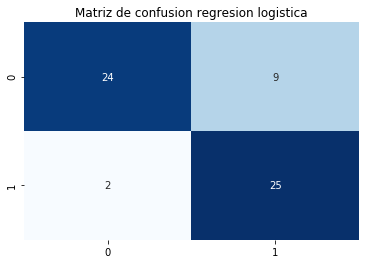

In [4]:
print('\033[1m''\033[4m' + 'Accuracy' + '\033[0m')
print('Train: ',accuracyTrain_LR)
print('Test: ',accuracyTest_LR)

#plt.subplot(2,3,1) tamaño
plt.title("Matriz de confusion regresion logistica")
sns.heatmap(confusionMatrix_LR ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h1> Random Forest </h1>

Accuracy
Train:  0.9703389830508474
Test:  0.85


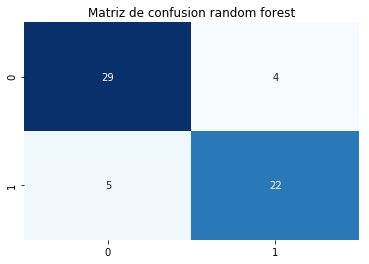

In [5]:
classifier_RDF = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=4)
classifier_RDF.fit(x_train,y_train)

#Predicción en Train
pred_RDF = classifier_RDF.predict(x_train)
accuracyTrain_RDF=accuracy_score(pred_RDF,y_train)

#Predicción en Test
pred_RDF = classifier_RDF.predict(x_test)
confusionMatrix_RDF = confusion_matrix(y_test,pred_RDF)
accuracyTest_RDF = accuracy_score(pred_RDF,y_test)

print('\033[1m''\033[4m' + 'Accuracy' + '\033[0m')
print('Train: ',accuracyTrain_RDF)
print('Test: ',accuracyTest_RDF)
plt.title("Matriz de confusion random forest")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h1>DecisionTree Classifier</h1>

Accuracy
Train:  0.940677966101695
Test:  0.7333333333333333


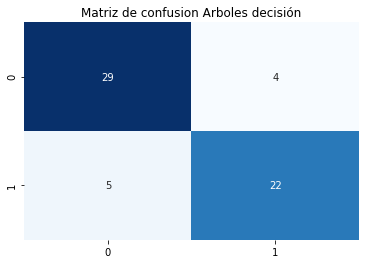

In [6]:
classifier_DTREE = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=7,max_features='auto')
classifier_DTREE.fit(x_train,y_train)

#Predicción en Train
pred_DTREE = classifier_DTREE.predict(x_train)
accuracyTrain_DTREE = accuracy_score(pred_DTREE,y_train)

#Predicción en Test
pred_DTREE = classifier_DTREE.predict(x_test)
accuracyTest_DTREE = accuracy_score(pred_DTREE,y_test)
confusionMatrix_DTREE = confusion_matrix(y_test,pred_DTREE)

print('\033[1m''\033[4m' + 'Accuracy' + '\033[0m')
print('Train: ',accuracyTrain_DTREE)
print('Test: ',accuracyTest_DTREE)

plt.title("Matriz de confusion Arboles decisión")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h1> KNN </h1>

Accuracy
Train:  0.7203389830508474
Test:  0.6666666666666666


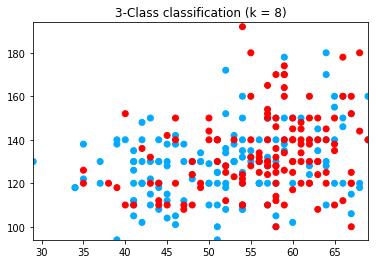

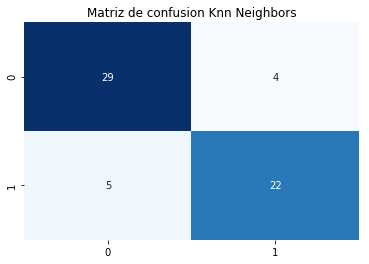

In [7]:
classifier_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
classifier_KNN.fit(x_train,y_train)

#Predicción en Train
pred_KNN = classifier_KNN.predict(x_train)
accuracyTrain_KNN = accuracy_score(pred_KNN,y_train)

#Predicción en Test
pred_KNN = classifier_KNN.predict(x_test)
accuracyTest_KNN = accuracy_score(pred_KNN,y_test)
confusionMatrix_KNN = confusion_matrix(y_test,pred_KNN)

print('\033[1m''\033[4m' + 'Accuracy' + '\033[0m')
print('Train: ',accuracyTrain_KNN)
print('Test: ',accuracyTest_KNN)


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

h = 10  # step size in the mesh

# calculate min, max and limits

x_min, x_max = x.iloc[:, 0].min() , x.iloc[:, 0].max() 
y_min, y_max = x.iloc[:, 1].min()  , x.iloc[:, 1].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))


# predict class using data and kNN classifier
Z = classifier_KNN.predict(x_test)

# Put the result into a color plot

Z = Z.reshape(x_test.shape[0])
plt.figure()

plt.pcolormesh(x_test, cmap=cmap_light)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (8))
plt.show()

plt.title("Matriz de confusion Knn Neighbors")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)



In [8]:
model = Sequential()
model.add(Dense(50, input_dim=19, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
output = model.fit(x_train, y_train,validation_split=0.3, epochs=1, batch_size=128)

Train on 165 samples, validate on 71 samples
Epoch 1/1
165/165 [==============================] - 0s 32us/step - loss: 0.3513 - acc: 0.8485 - val_loss: 0.4598 - val_acc: 0.8169


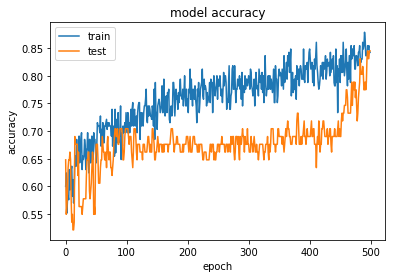

In [11]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#Dataset sin ingenieria de features
full_wf = pd.read_csv("./heart.csv")

x_wf = full.drop(['target'], axis = 1)
y_wf = full.target.values
X_train, X_test, Y_train, Y_test = train_test_split(x_wf, y_wf, test_size = 0.2, random_state=5)



,age,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,target,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical_angina,chest_pain_non_anginal_pain,chest_pain_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0,0,1,0,1,0
1,37,130,250,0,1,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0,0
2,41,130,204,0,0,172,0,1.4,2,0,1,1,0,0,0,1,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,1,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,1,1,0,1,0,0,0,1,0,0


In [26]:
#LOGISTIC REGRESSION
classifierWF_LR = LogisticRegression(random_state=4)
classifierWF_LR.fit(X_train,Y_train)

#Prediccion en Train
predWF_LR = classifierWF_LR.predict(X_train)
accuracyTrainWF_LR = accuracy_score(Y_train, predWF_LR)

#Prediccion en Test
predWF_LR = classifierWF_LR.predict(X_test)
accuracyTestWF_LR = accuracy_score(Y_test, predWF_LR)


#RANDOM FOREST
classifierWF_RDF = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=4)
classifierWF_RDF.fit(X_train,Y_train)

#Predicción en Train
predWF_RDF = classifierWF_RDF.predict(X_train)
accuracyTrainWF_RDF=accuracy_score(predWF_RDF,Y_train)

#Predicción en Test
predWF_RDF = classifierWF_RDF.predict(X_test)
accuracyTestWF_RDF = accuracy_score(predWF_RDF,Y_test)

#KNN NEIGHBORS
classifierWF_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
classifierWF_KNN.fit(X_train,Y_train)

#Predicción en Train
predWF_KNN = classifierWF_KNN.predict(X_train)
accuracyTrainWF_KNN = accuracy_score(predWF_KNN,Y_train)

#Predicción en Test
predWF_KNN = classifierWF_KNN.predict(X_test)
accuracyTestWF_KNN = accuracy_score(predWF_KNN,Y_test)

#REDES NEURONALES
modelWF = Sequential()
modelWF.add(Dense(50, input_dim=19, activation='tanh'))
modelWF.add(Dropout(0.1))
modelWF.add(Dense(50, activation='tanh'))
modelWF.add(Dropout(0.1))
modelWF.add(Dense(1, activation='sigmoid'))

modelWF.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

outputWF = modelWF.fit(X_train, Y_train,validation_split=0.3, epochs=1, batch_size=128)

/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train on 165 samples, validate on 71 samples
Epoch 1/1
165/165 [==============================] - 0s 2ms/step - loss: 0.8542 - acc: 0.5273 - val_loss: 0.6723 - val_acc: 0.6338


In [31]:

print('Accuracy Logistic Regression: ',accuracyTest_LR)
print('Accuracy Random Forest: ',accuracyTest_RDF)
print('Accuracy KNN: ',accuracyTest_KNN)

print("")
print('Accuracy Logistic Regression: ',accuracyTestWF_LR)
print('Accuracy Random Forest: ',accuracyTestWF_RDF)
print('Accuracy Logistic Regression: ',accuracyTestWF_KNN)

Accuracy Logistic Regression:  0.8166666666666667
Accuracy Random Forest:  0.85
Accuracy KNN:  0.6666666666666666

Accuracy Logistic Regression:  0.8166666666666667
Accuracy Random Forest:  0.85
Accuracy Logistic Regression:  0.6666666666666666
